# Análise Fatorial

Exemplo: percepções de cereais prontos para comer

(Lattin, James; Carroll, J. Douglas; Green, Paul E. Análise de dados multivariados. São Paulo: Cengage Learning, v. 455, 2011, capítulo 5, página 119, exemplo 5.3.1)

Como parte de um estudo das impressões do consumidor sobre cereais prontos para comer, patrocinado pela Kellogg da Austrália, Roberts e Lattin (1991) pesquisaram a percepção desses consumidores em relação às suas marcas favoritas de cereais. Solicitou-se a cada respondente que avaliasse suas três marcas preferidas tendo em mente cada um dos 25 atributos. Uma escala de cinco pontos foi utilizada para indicar a extensão de cada atributo em relação a cada marca.

São apresentados os dados de 12 marcas, com respostas de 116 pessoas em 235 observações.

Cereais:
1. All Bran
2. Cerola Muesli
3. Just right
4. Kellogg's Corn Flakes
5. Komplete
6. NutriGrain
7. Purina Muesli
8. Rice Bubbles
9. Special K
10. Sustain
11. Vitabrit
12. Weetbrix

Atributos:
- Satisfaz
- Natural
- Fibra
- Doce
- Fácil
- Sal
- Gratificante
- Energia
- Divertido
- Crianças
- Encharcado
- Econômico
- Saúde
- Família
- Calorias
- Simples
- Crocante
- Regular
- Açúcar
- Fruta
- Processo
- Qualidade
- Prazer
- Chato
- Nutritivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

In [2]:
from factor_analyzer import FactorAnalyzer

In [3]:
df = pd.read_csv('rte_cereal.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [4]:
df = df.rename(columns={'Col1':'Voluntário', 'Col2':'Cereal'})
df.head()

,Voluntário,Cereal,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [5]:
df['Cereal'] = pd.Categorical(df['Cereal'])
df['Voluntário'] = pd.Categorical(df['Voluntário'])

In [6]:
pd.crosstab(index=df['Cereal'], columns='count')

col_0,count
Cereal,
1,15
3,13
13,16
14,27
15,14
16,24
17,18
19,21
21,23


In [7]:
pd.crosstab(index=df['Voluntário'], columns='count')

col_0,count
Voluntário,
101,2
103,2
104,3
105,3
106,2
...,...
635,2
636,3
637,2


In [8]:
df = df.rename(columns={
'Col3':'Satisfaz',
'Col4':'Natural',
'Col5':'Fibra',
'Col6':'Doce',
'Col7':'Fácil',
'Col8':'Sal',
'Col9':'Gratificante',
'Col10':'Energia',
'Col11':'Divertido',
'Col12':'Crianças',
'Col13':'Encharcado',
'Col14':'Econômico',
'Col15':'Saúde',
'Col16':'Família',
'Col17':'Calorias',
'Col18':'Simples',
'Col19':'Crocante',
'Col20':'Regular',
'Col21':'Açúcar',
'Col22':'Fruta',
'Col23':'Processo',
'Col24':'Qualidade',
'Col25':'Prazer',
'Col26':'Chato',
'Col27':'Nutritivo'   
})

In [9]:
df.head()

,Voluntário,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [10]:
X = df.iloc[:,2:27]
X

,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,Divertido,Crianças,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,5,5,5,1,2,1,5,4,1,4,...,3,1,4,1,1,3,5,1,1,5
1,1,2,2,1,5,2,5,1,1,5,...,5,5,1,2,1,5,2,1,1,3
2,5,4,5,5,5,3,5,5,5,5,...,1,5,4,3,1,2,5,4,1,5
3,5,5,5,3,5,2,5,5,5,5,...,1,1,4,2,5,2,5,5,1,5
4,4,5,3,2,5,2,5,4,5,5,...,1,5,3,1,1,3,5,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,3,4,4,1,4,2,3,3,2,4,...,4,3,4,1,1,3,4,2,2,4
231,5,4,4,3,4,3,4,4,4,4,...,1,4,4,3,4,2,4,4,1,4
232,4,4,4,1,4,1,4,4,3,4,...,3,3,4,1,1,2,3,3,2,4
233,3,3,3,3,4,2,3,3,2,3,...,3,2,3,2,1,3,3,2,2,3


In [11]:
fa = FactorAnalyzer(n_factors=25, rotation='varimax')
fa.fit(X)

FactorAnalyzer(n_factors=25, rotation='varimax', rotation_kwargs={})

In [12]:
ev, v = fa.get_eigenvalues()
ev

array([6.5044682 , 3.8210452 , 2.50199528, 1.68399409, 1.08535397,
       0.93300686, 0.8516405 , 0.78683657, 0.73171687, 0.69585069,
       0.6468294 , 0.54795846, 0.52915688, 0.48962363, 0.41774279,
       0.38707401, 0.362461  , 0.35882947, 0.30475407, 0.27419206,
       0.26244808, 0.24227943, 0.2179754 , 0.19853087, 0.16423623])

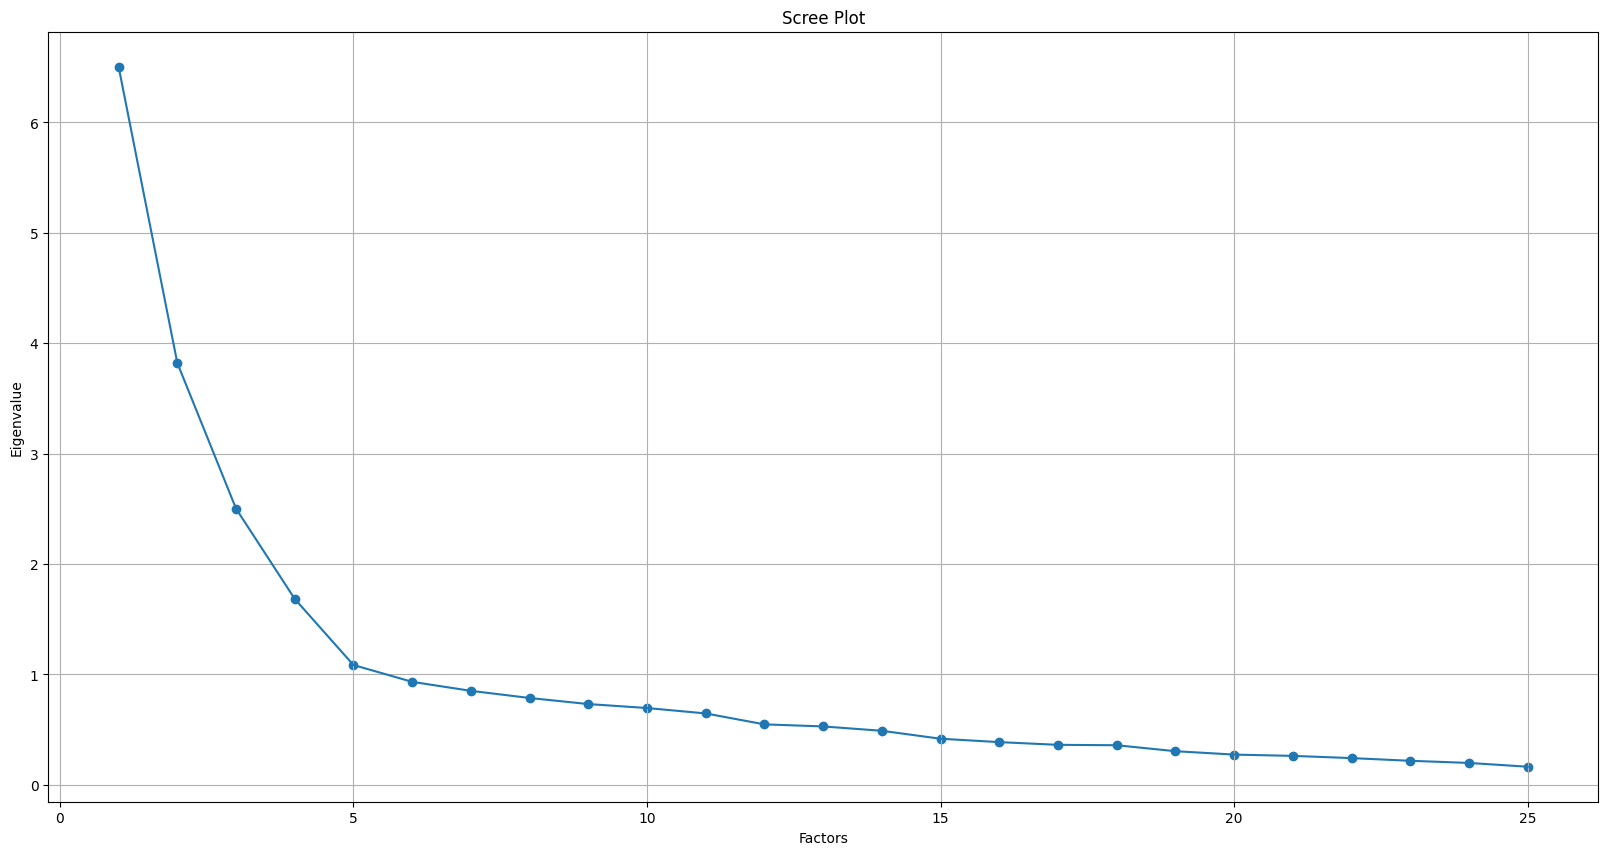

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,X.shape[1]+1), ev)
plt.plot(range(1,X.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Análise Fatorial com fatores não rotacionados

In [14]:
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(X)

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

Matriz L de cargas fatoriais estimadas

In [15]:
L = fa.loadings_
np.round(L, 2)

array([[ 0.72,  0.1 , -0.07,  0.18],
       [ 0.73, -0.24, -0.11,  0.11],
       [ 0.72, -0.24, -0.31,  0.17],
       [ 0.08,  0.74, -0.21,  0.15],
       [ 0.32,  0.14,  0.2 ,  0.11],
       [-0.21,  0.51, -0.14,  0.41],
       [ 0.72,  0.18,  0.16,  0.17],
       [ 0.7 ,  0.13, -0.07,  0.12],
       [ 0.39,  0.49,  0.21, -0.16],
       [ 0.22,  0.28,  0.76,  0.12],
       [-0.1 , -0.23,  0.15,  0.4 ],
       [ 0.15, -0.23,  0.47,  0.1 ],
       [ 0.81, -0.31, -0.11,  0.08],
       [ 0.31,  0.22,  0.67,  0.03],
       [-0.16,  0.57, -0.17,  0.21],
       [-0.31, -0.36,  0.22,  0.43],
       [ 0.29,  0.45,  0.21, -0.18],
       [ 0.58, -0.13, -0.18,  0.07],
       [-0.25,  0.74, -0.25,  0.25],
       [ 0.37,  0.25, -0.47, -0.15],
       [-0.3 ,  0.27,  0.  ,  0.23],
       [ 0.73, -0.14,  0.05, -0.03],
       [ 0.47,  0.57,  0.07, -0.21],
       [-0.38, -0.26, -0.1 ,  0.34],
       [ 0.8 , -0.22, -0.15,  0.13]])

In [16]:
fa.get_factor_variance()

(array([6.08645101, 3.36420207, 2.05504929, 1.11555393]),
 array([0.24345804, 0.13456808, 0.08220197, 0.04462216]),
 array([0.24345804, 0.37802612, 0.4602281 , 0.50485025]))

Análise Fatorial com fatores rotacionados (varimax)

In [17]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(X)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

Matriz L de cargas fatoriais estimada

In [18]:
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = X.columns
L.columns = ['FA1', 'FA2', 'FA3', 'FA4']
L

,FA1,FA2,FA3,FA4
Satisfaz,0.705926,0.088167,0.198221,0.152237
Natural,0.752800,-0.208911,0.054740,0.036777
Fibra,0.821203,-0.116397,-0.120859,0.020583
Doce,0.068946,0.701790,0.071968,0.347628
Fácil,0.238564,0.063576,0.324555,0.065804
Sal,-0.091826,0.685617,0.015718,-0.083106
Gratificante,0.625896,0.076987,0.422415,0.172316
Energia,0.659684,0.078210,0.191243,0.210825
Divertido,0.163479,0.176578,0.415016,0.480073
Crianças,-0.024322,0.035050,0.850781,0.013842


Maiores cargas nor primeiros dois fatores

In [19]:
L.sort_values(by='FA1', ascending=False).head(10)

,FA1,FA2,FA3,FA4
Nutritivo,0.831418,-0.176957,0.050701,0.056027
Saúde,0.828531,-0.288274,0.051120,0.046116
Fibra,0.821203,-0.116397,-0.120859,0.020583
Natural,0.752800,-0.208911,0.054740,0.036777
Satisfaz,0.705926,0.088167,0.198221,0.152237
Energia,0.659684,0.078210,0.191243,0.210825
Qualidade,0.646587,-0.244715,0.203617,0.171207
Gratificante,0.625896,0.076987,0.422415,0.172316
Regular,0.613091,-0.100074,-0.027949,0.088827
Fruta,0.376150,0.186503,-0.269375,0.441862


In [20]:
np.round(fa.get_communalities(),2)

array([0.57, 0.61, 0.7 , 0.62, 0.17, 0.49, 0.61, 0.52, 0.46, 0.73, 0.24,
       0.31, 0.77, 0.59, 0.42, 0.46, 0.36, 0.39, 0.73, 0.44, 0.21, 0.55,
       0.59, 0.34, 0.73])

Sugestão de denominação do primeiro fator: Saudável

In [21]:
L.sort_values(by='FA2', ascending=False).head(10)

,FA1,FA2,FA3,FA4
Açúcar,-0.183849,0.816649,-0.053763,0.165341
Doce,0.068946,0.701790,0.071968,0.347628
Sal,-0.091826,0.685617,0.015718,-0.083106
Calorias,-0.113644,0.626649,-0.008372,0.120616
Processo,-0.236000,0.373960,0.026508,-0.125563
Prazer,0.244884,0.233365,0.333632,0.603503
Fruta,0.376150,0.186503,-0.269375,0.441862
Divertido,0.163479,0.176578,0.415016,0.480073
Crocante,0.073932,0.145985,0.370988,0.437885
Satisfaz,0.705926,0.088167,0.198221,0.152237


Sugestão de denominação do segundo fator: Artificial ou Não-saudável

In [22]:
L.sort_values(by='FA3', ascending=False).head(10)

,FA1,FA2,FA3,FA4
Crianças,-0.024322,0.035050,0.850781,0.013842
Família,0.062455,-0.054532,0.760629,0.093225
Gratificante,0.625896,0.076987,0.422415,0.172316
Econômico,0.068874,-0.280265,0.416057,-0.227187
Divertido,0.163479,0.176578,0.415016,0.480073
Crocante,0.073932,0.145985,0.370988,0.437885
Prazer,0.244884,0.233365,0.333632,0.603503
Fácil,0.238564,0.063576,0.324555,0.065804
Qualidade,0.646587,-0.244715,0.203617,0.171207
Satisfaz,0.705926,0.088167,0.198221,0.152237


Sugestão de denominação do terceiro fator: Familiar ou Popular

In [23]:
L.sort_values(by='FA4', ascending=False).head(10)

,FA1,FA2,FA3,FA4
Prazer,0.244884,0.233365,0.333632,0.603503
Divertido,0.163479,0.176578,0.415016,0.480073
Fruta,0.376150,0.186503,-0.269375,0.441862
Crocante,0.073932,0.145985,0.370988,0.437885
Doce,0.068946,0.701790,0.071968,0.347628
Energia,0.659684,0.078210,0.191243,0.210825
Gratificante,0.625896,0.076987,0.422415,0.172316
Qualidade,0.646587,-0.244715,0.203617,0.171207
Açúcar,-0.183849,0.816649,-0.053763,0.165341
Satisfaz,0.705926,0.088167,0.198221,0.152237


Sugestão de denominação do quarto fator: Empolgante

Variância explicada por cada fator

In [24]:
fa.get_factor_variance()

(array([5.20310472, 2.66037192, 2.46709535, 2.29068432]),
 array([0.20812419, 0.10641488, 0.09868381, 0.09162737]),
 array([0.20812419, 0.31453907, 0.41322288, 0.50485025]))

In [25]:
np.sum(fa.get_factor_variance())

14.566842943899621

In [26]:
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.35718822, 0.18263202, 0.16936376, 0.15725331],
       [0.01428753, 0.00730528, 0.00677455, 0.00629013],
       [0.01428753, 0.02159281, 0.02836736, 0.03465749]])

Variância percentual explicada por cada fator

In [27]:
np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance()),2)

array([[0.36, 0.18, 0.17, 0.16],
       [0.01, 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.03, 0.03]])

In [28]:
df[['Fator1', 'Fator2', 'Fator3', 'Fator4']] = np.array(fa.fit_transform(X))[:, 0:4]

In [29]:
df.sort_values(by='Fator1', ascending=False).head(10)

,Voluntário,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
40,121,23,5,5,5,5,5,3,5,5,...,4,4,4,5,1,5,1.800709,1.772916,0.594875,0.946000
158,509,24,5,5,5,4,5,4,5,5,...,1,3,3,1,1,5,1.785628,0.970817,-0.017714,-1.697611
31,116,1,5,4,5,1,5,2,5,5,...,1,3,5,2,4,5,1.701156,-0.150973,-1.156637,-0.790033
78,214,24,5,5,5,2,4,1,5,5,...,1,5,5,3,3,5,1.667463,-0.266892,0.957614,-1.141936
3,103,3,5,5,5,3,5,2,5,5,...,5,2,5,5,1,5,1.647908,-0.057011,0.503627,1.035768
153,507,25,5,5,5,2,5,2,5,5,...,1,3,5,3,1,5,1.641595,-0.148362,1.223116,-1.246876
73,211,15,4,5,5,3,3,2,3,5,...,4,2,5,2,3,5,1.628144,0.605894,-2.114578,-0.170092
219,632,14,5,5,5,4,5,2,5,5,...,1,1,5,5,1,5,1.573668,0.338263,1.198971,1.136659
220,633,15,5,5,5,4,5,1,5,4,...,3,1,5,4,1,5,1.516582,-0.040930,0.625978,0.780042
221,633,3,5,5,5,4,5,1,5,4,...,3,1,5,4,1,5,1.516582,-0.040930,0.625978,0.780042


In [30]:
df[df['Cereal']==15]

,Voluntário,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
38,120,15,4,4,3,4,4,3,4,3,...,4,5,3,4,1,3,-0.344921,1.724422,-0.674575,1.032655
47,127,15,5,4,3,2,4,2,4,3,...,3,2,3,2,2,4,0.263458,-0.163579,-1.462259,0.137595
50,200,15,3,4,4,3,4,1,3,4,...,2,2,3,2,1,4,0.135824,-0.419005,-2.284010,0.496788
56,203,15,5,4,4,3,5,2,5,3,...,4,2,4,3,1,4,0.303946,-0.125127,-1.165262,1.330198
63,206,15,5,5,3,5,5,3,5,5,...,3,3,5,5,1,5,1.350208,1.406960,-0.225290,1.383059
73,211,15,4,5,5,3,3,2,3,5,...,4,2,5,2,3,5,1.628144,0.605894,-2.114578,-0.170092
74,212,15,2,4,4,2,2,2,4,4,...,2,2,3,2,2,4,0.172819,-0.263814,-1.964841,-0.091331
97,305,15,4,4,4,2,5,2,4,4,...,3,3,4,3,1,4,0.431277,0.049408,-0.677134,0.359084
112,313,15,3,4,4,3,4,1,3,4,...,4,4,3,3,1,4,-0.099992,0.456770,-1.174220,0.775907
116,315,15,4,4,4,3,3,3,3,4,...,3,4,4,1,3,4,0.584188,0.845256,-1.365151,-0.805348


In [31]:
df[df['Cereal']==15].describe()

,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,Divertido,Crianças,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,4.000000,4.214286,3.928571,3.071429,4.071429,1.928571,4.000000,3.928571,2.714286,2.714286,...,3.357143,2.571429,3.785714,3.000000,1.500000,4.214286,0.546503,0.232170,-1.014129,0.599498
std,0.960769,0.578934,0.730046,0.916875,0.916875,0.828742,0.877058,0.916875,0.994490,1.204388,...,0.841897,1.157868,0.892582,1.176697,0.759555,0.578934,0.665403,0.725251,0.915496,0.730323
min,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,3.000000,1.000000,1.000000,3.000000,-0.344921,-0.792083,-2.284010,-0.805348
25%,3.250000,4.000000,3.250000,2.250000,4.000000,1.000000,3.000000,3.250000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,1.000000,4.000000,0.145073,-0.238755,-1.437982,0.141598
50%,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.000000,...,3.000000,2.000000,3.500000,3.000000,1.000000,4.000000,0.323830,0.004239,-1.177433,0.636348
75%,5.000000,4.750000,4.000000,3.750000,5.000000,2.750000,5.000000,4.750000,3.000000,3.000000,...,4.000000,3.000000,4.750000,3.750000,2.000000,4.750000,1.158703,0.568613,-0.675215,1.064779
max,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,1.628144,1.724422,0.760020,1.935319
